<a href="https://colab.research.google.com/github/RMoulla/Acculturation_IA/blob/main/Copie_de_Classification_Churn_Correction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explication et prédiction du churn avec le machine learning

Ce TP vise à explorer et comparer différentes techniques de classification en machine learning pour expliquer et prédire le churn des clients. Le churn, ou l'attrition, est un indicateur clé pour de nombreuses entreprises ; il reflète le pourcentage de clients qui cessent d'utiliser un service sur une période donnée. Comprendre et prédire efficacement le churn peut aider les entreprises à mettre en œuvre des stratégies de rétention ciblées et à améliorer la satisfaction client.

## Le Dataset

Le dataset utilisé dans ce tutoriel contient des données sur les clients d'une entreprise, avec plusieurs caractéristiques qui pourraient influencer leur décision de rester ou de partir.

Ci-dessous un aperçu des variables incluses dans le dataset :

**Names** : Nom du client.

**Age** : Âge du client.

**Total_Purchase** : Montant total des achats effectués par le client.

**Account_Manager** : Indique si un gestionnaire de compte est assigné au client (1) ou non (0).

**Years** : Nombre d'années pendant lesquelles le client est avec l'entreprise.

**Num_Sites** : Nombre de sites utilisés par le client.

Onboard_date: Date à laquelle le client a été acquis.

**Location** : Emplacement du client.

**Company** : Nom de l'entreprise du client.

**Churn** : Indique si le client a churné (1) ou non (0).

## Objectifs Spécifiques du TP

**Exploration de Données** : Comprendre la distribution des données, la corrélation entre les variables et le taux de churn.

**Prétraitement des Données** : Nettoyer et préparer les données pour la modélisation, y compris le traitement des variables catégorielles et la division des données en ensembles d'entraînement et de test.

**Modélisation** : Appliquer plusieurs modèles de classification, tels que la régression logistique, Random Forest et les SVM pour prédire le churn.

**Évaluation des Modèles** : Comparer les performances des modèles en utilisant des métriques telles que la précision, le rappel, l'accuracy, et l'AUC-ROC.

**Optimisation** : Effectuer une optimisation des hyperparamètres sur les modèles sélectionnés pour améliorer leurs performances.

**Interprétation** : Analyser les résultats pour identifier les facteurs clés influençant le churn et discuter des implications pour les stratégies de rétention des clients.

In [ ]:
import pandas as pd

dataset = pd.read_csv('customer_churn.csv')
dataset.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


## Analyse exploratoire des données

Nous allons commencer par une analyse exploratoire des données. Cette phase vise à comprendre les données, leur distribution et les relations entre les variables, notamment entre les variables dépendantes (features) et la variable d'intérêt.

In [ ]:
# Quelques statistiques descriptives
print(dataset.describe())

              Age  Total_Purchase  Account_Manager       Years   Num_Sites  \
count  900.000000      900.000000       900.000000  900.000000  900.000000   
mean    41.816667    10062.824033         0.481111    5.273156    8.587778   
std      6.127560     2408.644532         0.499921    1.274449    1.764836   
min     22.000000      100.000000         0.000000    1.000000    3.000000   
25%     38.000000     8497.122500         0.000000    4.450000    7.000000   
50%     42.000000    10045.870000         0.000000    5.215000    8.000000   
75%     46.000000    11760.105000         1.000000    6.110000   10.000000   
max     65.000000    18026.010000         1.000000    9.150000   14.000000   

            Churn  
count  900.000000  
mean     0.166667  
std      0.372885  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      0.000000  
max      1.000000  


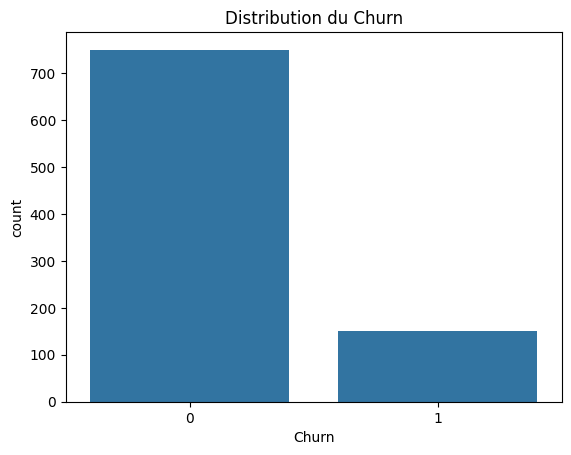

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution de la variable Churn
sns.countplot(x='Churn', data=dataset)
plt.title('Distribution du Churn')
plt.show()

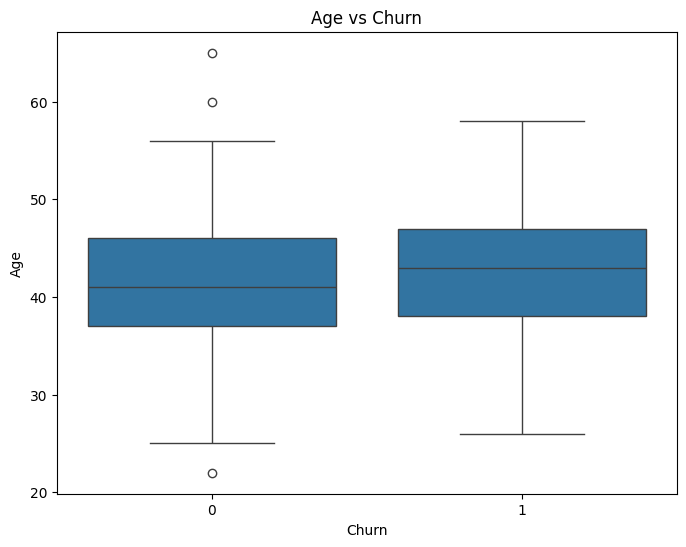

In [ ]:

# Age vs Churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Age', data=dataset)
plt.title('Age vs Churn')
plt.show()

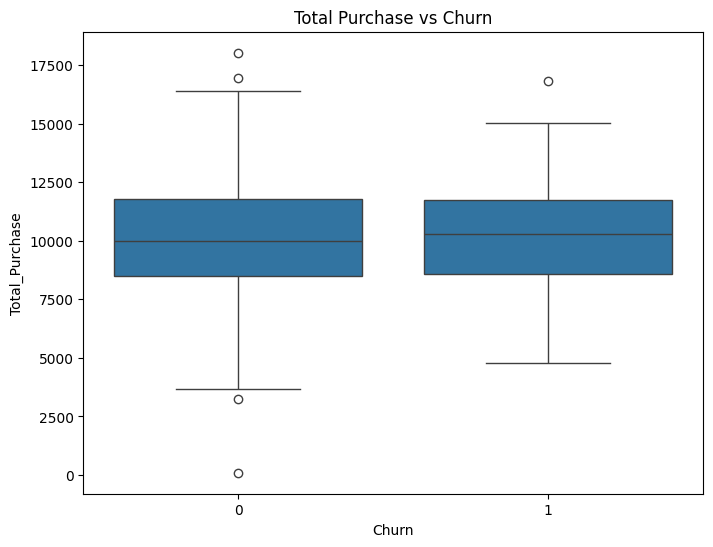

In [ ]:

# Total Purchase vs Churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Total_Purchase', data=dataset)
plt.title('Total Purchase vs Churn')
plt.show()

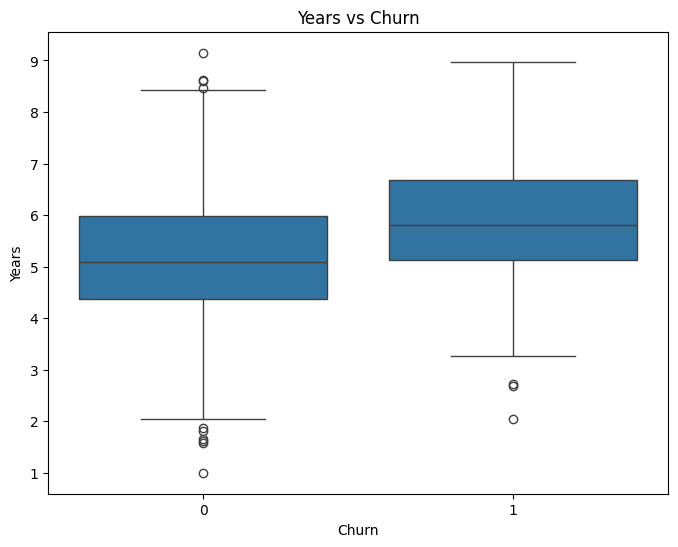

In [ ]:

# Years vs Churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Years', data=dataset)
plt.title('Years vs Churn')
plt.show()

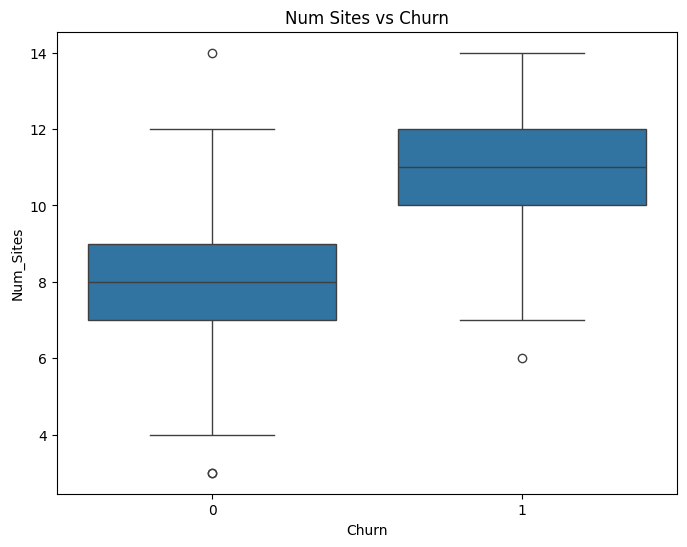

In [ ]:
plt.show()

# Num Sites vs Churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Num_Sites', data=dataset)
plt.title('Num Sites vs Churn')
plt.show()

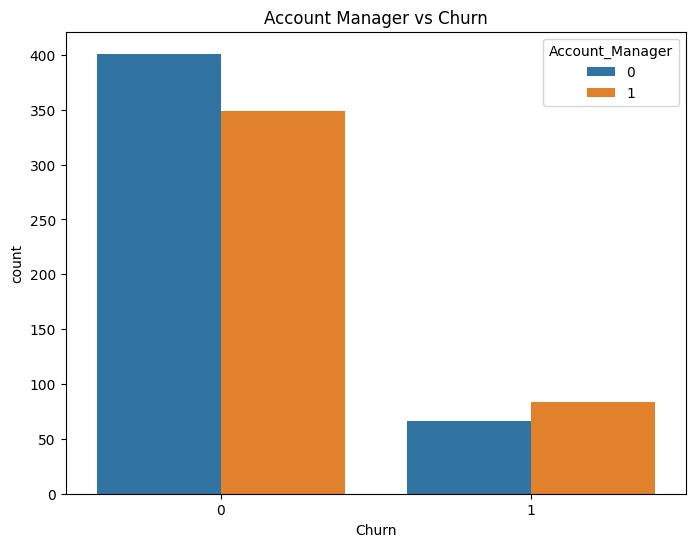

In [ ]:
# Account Manager vs Churn
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', hue='Account_Manager', data=dataset)
plt.title('Account Manager vs Churn')
plt.show()

## Modélisation

Dans cette phase, nous allons entraîner plusieurs modèles de classification, dont la régression logistique, Random Forest, et potentiellement et les SVM. Notre objectif est à la fois la compréhension des déterminants de churn et la prédiction de celui-ci.

Nous allons d'abord commencer par partionner notre dataset en jeu de données d'entraînement et jeu de données de test.

In [ ]:
from sklearn.model_selection import train_test_split
# Partionner le dataset en train et test

features = ['Age', 'Total_Purchase', 'Account_Manager', 'Years', 'Num_Sites']
X = dataset[features]
y = dataset['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Régression logistique

In [ ]:
import statsmodels.api as sm

X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

logit_model = sm.Logit(y_train, X_train_const)
result_sm = logit_model.fit()

result_sm.summary()

Optimization terminated successfully.
         Current function value: 0.257054
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                  720
Model:                          Logit   Df Residuals:                      714
Method:                           MLE   Df Model:                            5
Date:                Wed, 07 May 2025   Pseudo R-squ.:                  0.4237
Time:                        15:54:15   Log-Likelihood:                -185.08
converged:                       True   LL-Null:                       -321.17
Covariance Type:            nonrobust   LLR p-value:                 9.559e-57
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -19.1136      1.931     -9.896      0.000     -22.899     -15.328
Age                 0.0491      0.023      2.114      0.034       0.004       0.095
Total_Purchase   3.566e-05   5.51e-05      0.647      0.518   -7.24e-05       0.000
Account_Manager     0.5457      0.269      2.030      0.042       0.019       1.072
Years               0.5278      0.107      4.939      0.000       0.318       0.737
Num_Sites           1.2499      0.115     10.839      0.000       1.024       1.476
===================================================================================
"""

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_test_pred_prob = result_sm.predict(X_test_const)

y_test_pred_sm = (y_test_pred_prob >= 0.25).astype(int)

# Calculate performance metrics using statsmodels predictions
accuracy = accuracy_score(y_test, y_test_pred_sm)
precision = precision_score(y_test, y_test_pred_sm)
recall = recall_score(y_test, y_test_pred_sm)
f1 = f1_score(y_test, y_test_pred_sm)

performance_metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}

performance_metrics

{'Accuracy': 0.9,
 'Precision': 0.7058823529411765,
 'Recall': 0.75,
 'F1 Score': 0.7272727272727273}

In [ ]:
y_test_pred_prob

,0
70,0.397622
827,0.179830
231,0.019421
588,0.129233
39,0.671608
...,...
897,0.000186
578,0.901334
779,0.014015
25,0.457460


In [ ]:
y_test_pred_prob

,0
70,0.397622
827,0.179830
231,0.019421
588,0.129233
39,0.671608
...,...
897,0.000186
578,0.901334
779,0.014015
25,0.457460


### Régression logistique avec régularisation

Nous allons essayer une régression logistique avec une régularisation Ridge.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Définir la grille des valeurs à tester pour l'hyperparamètre de régularisation

C_values = [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10]

performance_metrics = []

# Boucler sur les valeurs de l'hyperparamètre
for c in C_values:
  model = LogisticRegression(penalty='l2', C=c)
  model.fit(X_train_scaled, y_train)

  # Prédire sur le dataset de test
  y_pred = model.predict(X_test_scaled)

  # Calculer les métriques de performance
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  # Ajouter les performances à la liste pour les stocker
  performance_metrics.append({
    'C': c,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
  })


performance_df = pd.DataFrame(performance_metrics)

print(performance_df)

       C  Accuracy  Precision   Recall  F1 Score
0   0.01  0.827778   1.000000  0.03125  0.060606
1   0.05  0.872222   0.800000  0.37500  0.510638
2   0.10  0.883333   0.761905  0.50000  0.603774
3   0.50  0.900000   0.769231  0.62500  0.689655
4   1.00  0.900000   0.769231  0.62500  0.689655
5   2.00  0.900000   0.769231  0.62500  0.689655
6   5.00  0.900000   0.769231  0.62500  0.689655
7  10.00  0.900000   0.769231  0.62500  0.689655


### Random forest

In [ ]:
# prompt: Un random forest simple

from sklearn.ensemble import RandomForestClassifier

# Créer un modèle Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Entraîner le modèle
rf_model.fit(X_train, y_train)

# Prédire sur le jeu de test
y_pred_rf = rf_model.predict(X_test)

# Évaluer les performances
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1-Score: {f1_rf}")


Accuracy: 0.8722222222222222
Precision: 0.7368421052631579
Recall: 0.4375
F1-Score: 0.5490196078431373


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Définition des hyperparamètres
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [2, 5, 10]
}

# Initialiser le random forest
rf_model = RandomForestClassifier(random_state=42)

# Réaliser une une validation croisée
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

# Extraire le meilleur modèle
best_model = grid_search.best_estimator_

# Prédire sur le dataset de test
y_test_pred_best_model = best_model.predict(X_test)

# Calculer les métriques de performance
accuracy_best_model = accuracy_score(y_test, y_test_pred_best_model)
precision_best_model = precision_score(y_test, y_test_pred_best_model)
recall_best_model = recall_score(y_test, y_test_pred_best_model)
f1_best_model = f1_score(y_test, y_test_pred_best_model)

performance_metrics_best_model = {
    'Accuracy': accuracy_best_model,
    'Precision': precision_best_model,
    'Recall': recall_best_model,
    'F1 Score': f1_best_model
}

performance_metrics_best_model

{'Accuracy': 0.8722222222222222,
 'Precision': 0.7368421052631579,
 'Recall': 0.4375,
 'F1 Score': 0.5490196078431373}

## Rééchantillonage du jeu de données

Nous allons maintenant essayer de travailler sur les données pour améliorer les performance. La difficulté principale de ce jeu de données vient de la présence d'une classe minoritaire (16% de 1). Nous allons essayer de rééquilibrer notre dataset en augmentant la classe minoritaire par la création de données synthétiques. Pour ce faire, nous allons utiliser le package `SMOTE` qui permet de générer des observations en interpolant à partir des points de données existants de la classe minoritaire.

In [ ]:
!pip install imbalanced-learn

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

pipeline_smote_lr = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=5000, random_state=42))
])

# Paramètres à tester pour SMOTE et la régression logistique
param_grid_smote_lr = {
    'smote__sampling_strategy': [0.4, 0.5, 0.6, 0.7],  # Proportions à tester pour SMOTE
    'classifier__C': [0.01, 0.1, 1, 5, 10]  # Valeurs de C à tester pour la régression logistique
}

# Recherche sur grille pour trouver les meilleurs hyperparamètres
grid_search_smote_lr = GridSearchCV(pipeline_smote_lr, param_grid_smote_lr, cv=5, scoring='recall')
grid_search_smote_lr.fit(X_train, y_train)

# Meilleur modèle trouvé avec SMOTE et régression logistique
best_model_smote_lr = grid_search_smote_lr.best_estimator_

# Prédictions avec le meilleur modèle
y_pred_smote_lr = best_model_smote_lr.predict(X_test)
y_pred_proba_smote_lr = best_model_smote_lr.predict_proba(X_test)[:, 1]

# Calcul des métriques
classification_rep_smote_lr = classification_report(y_test, y_pred_smote_lr, output_dict=True)

# Extraction des métriques spécifiques
recall_smote_lr = classification_rep_smote_lr['1']['recall']
precision_smote_lr = classification_rep_smote_lr['1']['precision']
f1_score_smote_lr = classification_rep_smote_lr['1']['f1-score']

# Création d'un DataFrame pour afficher les résultats
metrics_smote_lr = pd.DataFrame({
    'Metric': ['Recall', 'Precision', 'F1 Score'],
    'Value': [recall_smote_lr, precision_smote_lr, f1_score_smote_lr]
})

print(metrics_smote_lr)
print("Best Parameters: ", grid_search_smote_lr.best_params_)

      Metric     Value
0     Recall  0.750000
1  Precision  0.648649
2   F1 Score  0.695652
Best Parameters:  {'classifier__C': 0.1, 'smote__sampling_strategy': 0.7}
